In [1]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

nltk.download('wordnet')

sns.set(style='whitegrid', palette='muted')

[nltk_data] Downloading package wordnet to /Users/jskaf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
path = os.path.dirname("data/fashion-dataset/")

In [9]:
df = pd.read_csv(os.path.join(path,"styles.csv"), encoding='utf-8', on_bad_lines='skip')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [11]:
print(len(df['articleType'].unique()))

143


<Axes: xlabel='id', ylabel='baseColour'>

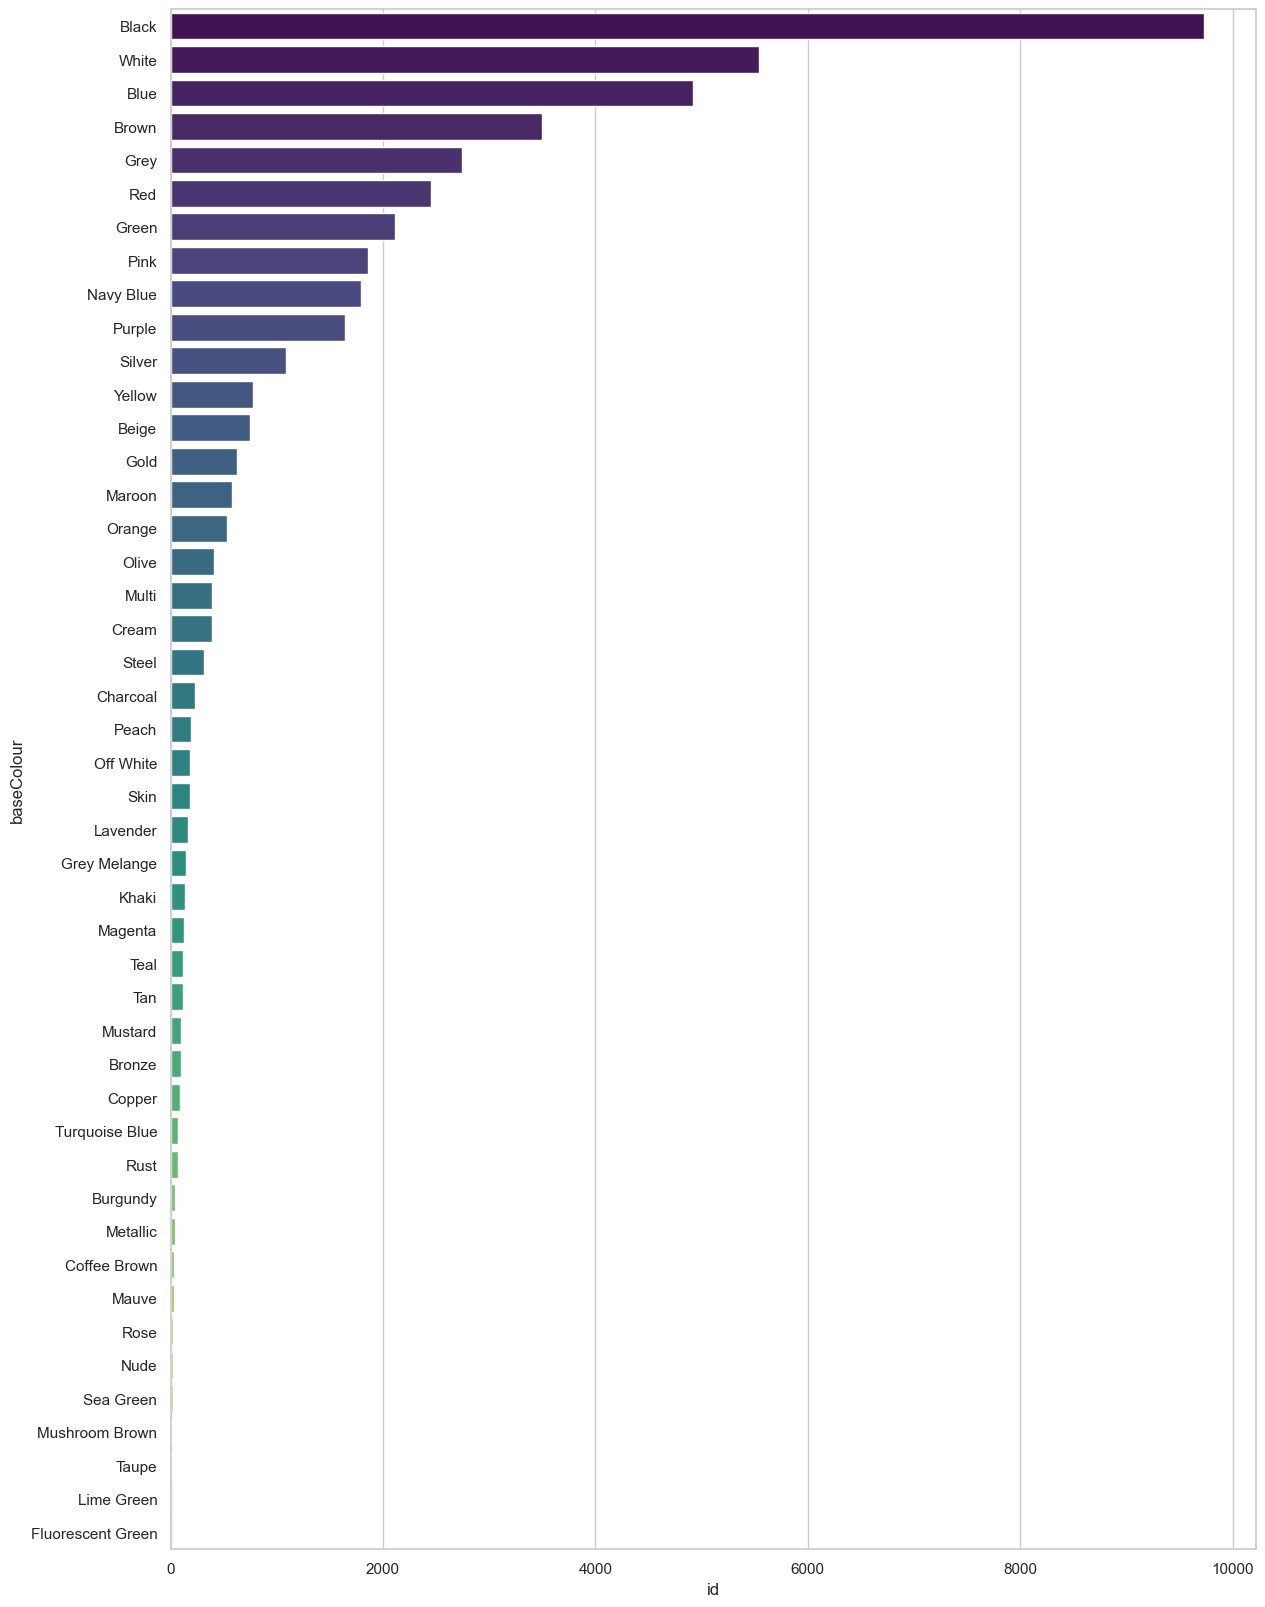

In [13]:
df_color = (df[['id','baseColour']]
        .dropna()
        .groupby(['baseColour'], as_index=False).count()
        .sort_values(by='id', ascending=False)

)

plt.figure(figsize=(14,20))
sns.barplot(x='id', y='baseColour', data=df_color, palette='viridis')

<Axes: xlabel='id', ylabel='articleType'>

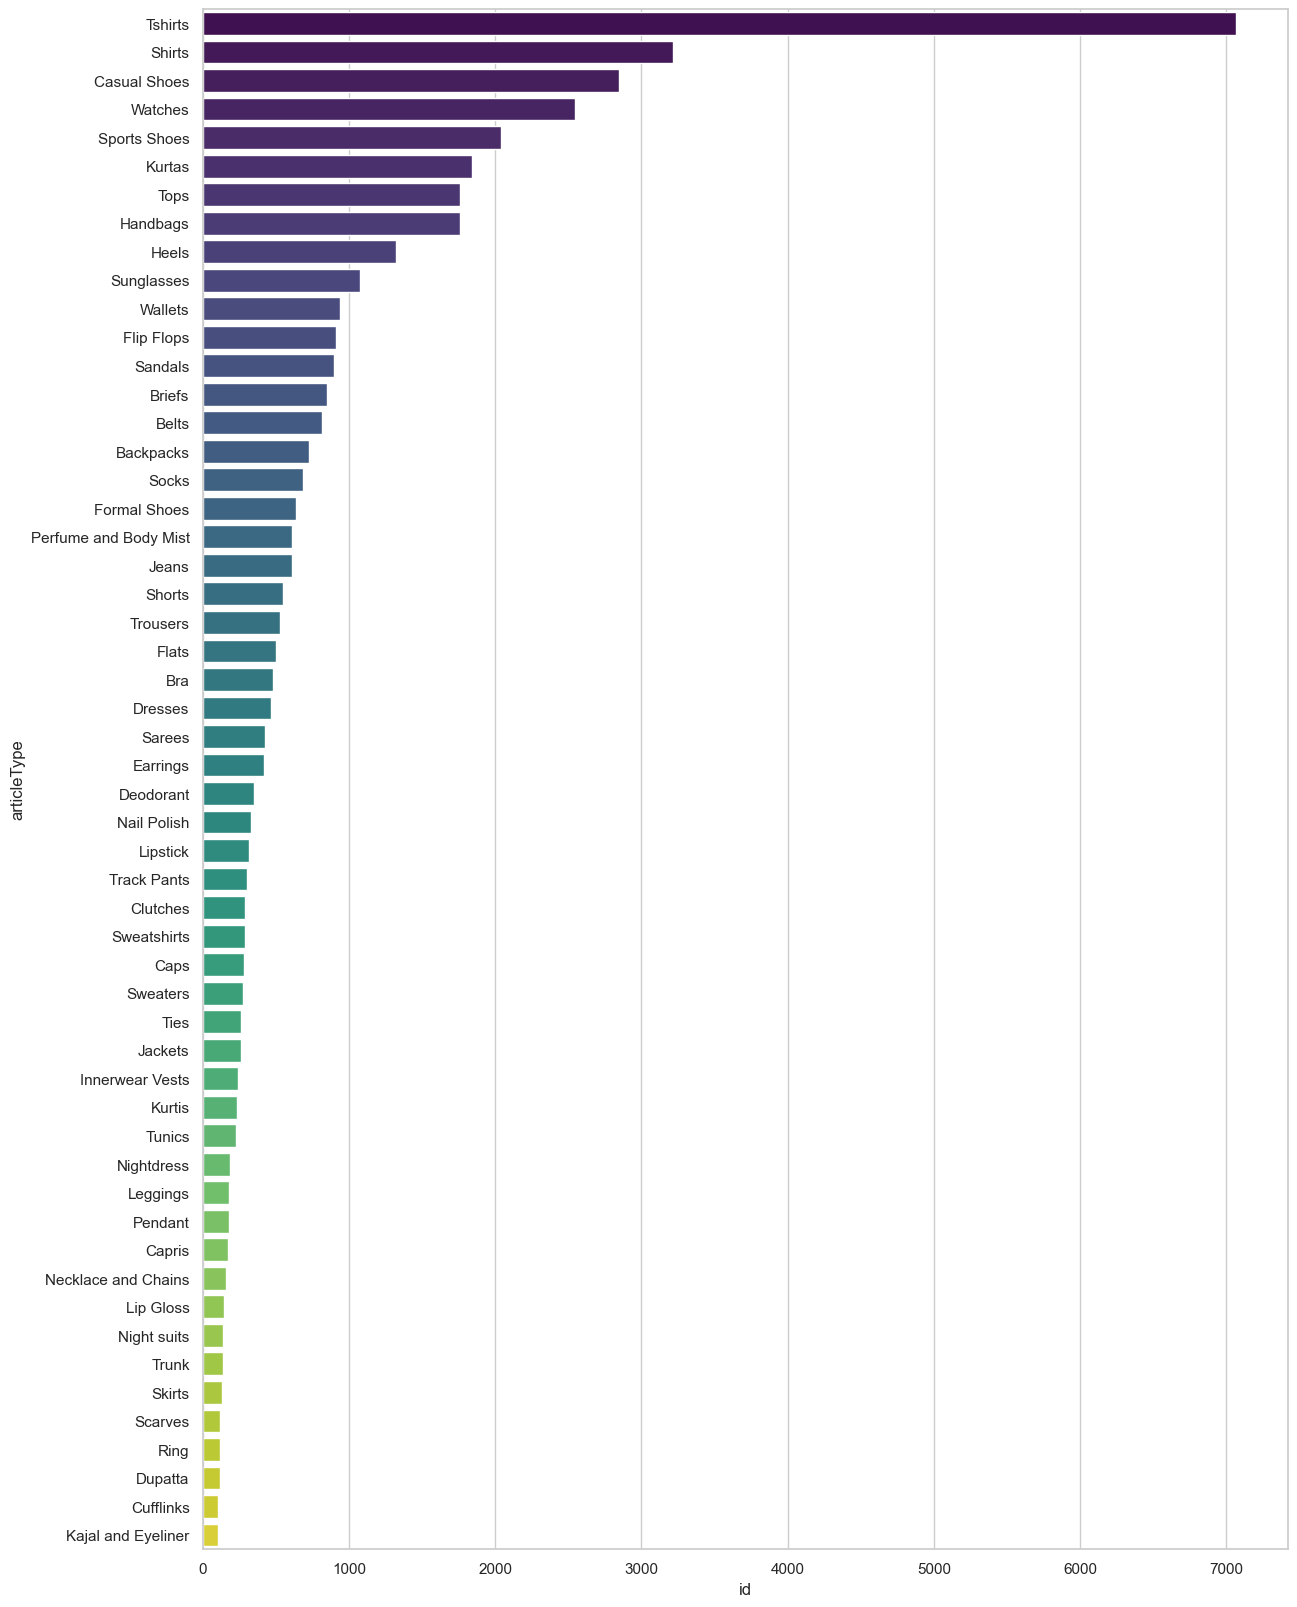

In [14]:
df_product_type = (df[['articleType','id']]
        .dropna()
        .groupby(['articleType'], as_index=False).count()
        .sort_values(by='id', ascending=False)
        #drop rows with number of product type less than 100
        .query('id > 100')

)
df_product_type

plt.figure(figsize=(14,20))
sns.barplot(x='id', y='articleType', data=df_product_type, palette='viridis')

In [15]:
def preprocess_lemma(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    
    return tokens

In [16]:
df_description = df['productDisplayName'].dropna()

In [17]:
# Build frequency dictionaries
entry_texts_freq = Counter()

for entry_text in tqdm(df_description):
    entry_texts_freq.update(preprocess_lemma(entry_text))

100%|██████████| 44417/44417 [00:04<00:00, 10484.36it/s]


(-0.5, 799.5, 399.5, -0.5)

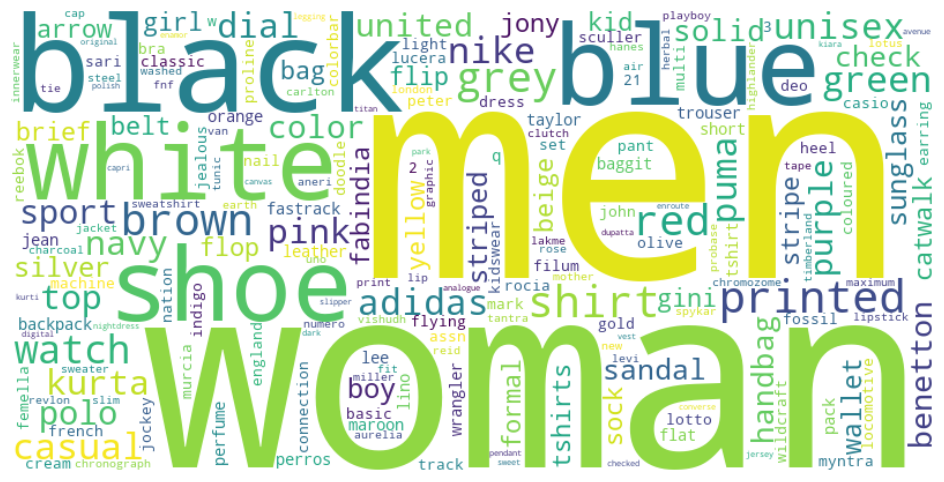

In [18]:
#Do a word cloud for the words in description
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='white').generate_from_frequencies(entry_texts_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [19]:
print(df['gender'].unique())

['Men' 'Women' 'Boys' 'Girls' 'Unisex']


<Axes: xlabel='gender', ylabel='id'>

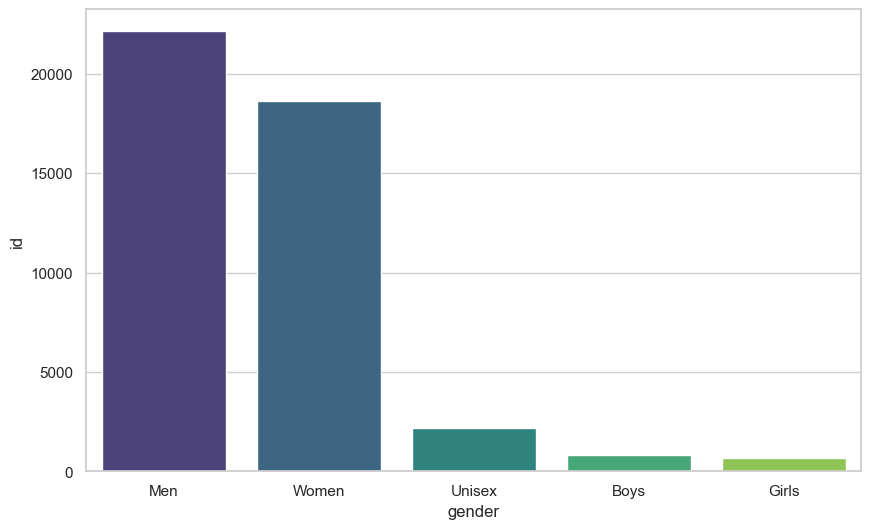

In [20]:
df_index_group = (df[['gender','id']]
        .dropna()
        .groupby(['gender'], as_index=False).count()
        .sort_values(by='id', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(y='id', x='gender', data=df_index_group, palette='viridis')

In [21]:
print(df["subCategory"].unique())

['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']


([<matplotlib.patches.Wedge at 0x2a2481650>,
 [Text(-1.0712534220356502, -0.24983215521007165, 'Topwear'),
  Text(0.412093924073497, -1.019891463706657, 'Other'),
  Text(1.0990088091254968, 0.046686587630257334, 'Shoes'),
  Text(0.7484307344449298, 0.8061336339207188, 'Bags'),
  Text(0.24331481786782536, 1.0727524874853225, 'Bottomwear'),
  Text(-0.13603292136289324, 1.0915562488051072, 'Jewellery'),
  Text(-0.47555099538615264, 0.9918927617374973, 'Watches'),
  Text(-0.7383899054878647, 0.8153406327870717, 'Innerwear')],
 [Text(-0.5843200483830818, -0.13627208466003907, '29.5%'),
  Text(0.22477850404008923, -0.5563044347490855, '25.4%'),
  Text(0.5994593504320891, 0.02546541143468582, '13.7%'),
  Text(0.40823494606087074, 0.43970925486584655, '11.1%'),
  Text(0.13271717338245018, 0.5851377204465394, '5.6%'),
  Text(-0.07419977528885086, 0.5953943175300584, '5.4%'),
  Text(-0.2593914520288105, 0.5410324154931803, '4.8%'),
  Text(-0.40275813026610796, 0.44473125424749366, '4.4%')])

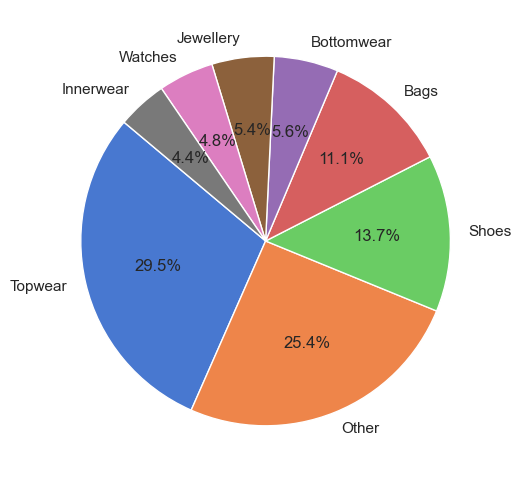

In [25]:
index_group_name = 'Women' # Select between 'Men', 'Women', 'Unisex', 'Boys', 'Girls'

df_section_name = (df[df['gender'] == index_group_name]
        [['subCategory','id']]
        .dropna()
        .groupby(['subCategory'], as_index=False).count()
        .sort_values(by='id', ascending=False)
)

plt.figure(figsize=(10,6))
#create pie chart with percentage and regroup in other if less than 5%

df_section_name['percentage'] = (df_section_name['id'] / df_section_name['id'].sum()) * 100
df_section_name['percentage'] = df_section_name['percentage'].round(2)

df_section_name['subCategory'] = df_section_name.apply(lambda x: x['subCategory'] if x['percentage'] > 3 else 'Other', axis=1)

df_section_name = (df_section_name
        .groupby(['subCategory'], as_index=False).sum()
        .sort_values(by='id', ascending=False)
)

plt.pie(df_section_name['id'], labels=df_section_name['subCategory'], autopct='%1.1f%%', startangle=140)


In [26]:
print(df['masterCategory'].unique())

['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']


<Axes: xlabel='id', ylabel='masterCategory'>

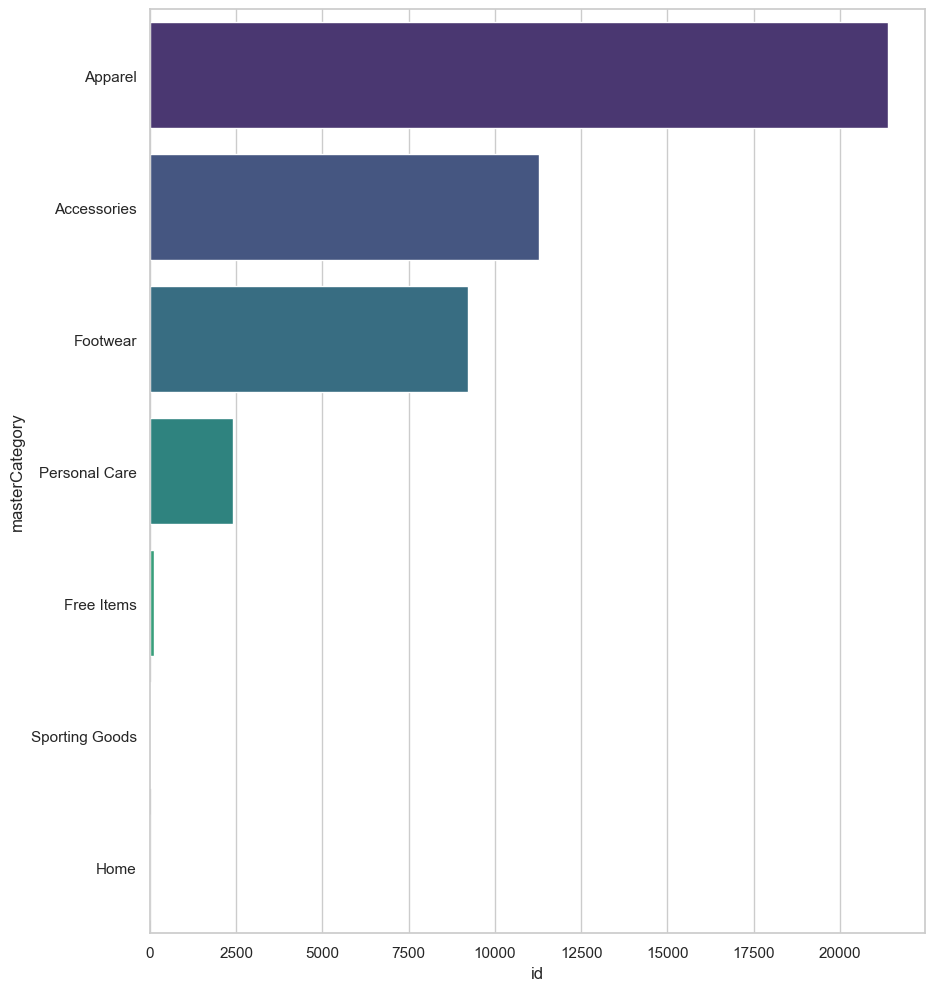

In [27]:
df_graphical_appearance = (df[['masterCategory','id']]
        .dropna()
        .groupby(['masterCategory'], as_index=False).count()
        .sort_values(by='id', ascending=False)
        
)

plt.figure(figsize=(10,12))
sns.barplot(x='id', y='masterCategory', data=df_graphical_appearance, palette='viridis')
